# Глава 1. Полносвязные нейронные сети

Для понимания того, как устроена простая полносвязная нейронная сеть мы разработаем пример подобной сети на чистом numpy.

## 1. Нейронная сеть состоит из следующих элементов:
* Слой входных параметров **x**
* Несколько скрытых слоев (hidden layers)
* Выход сети **y**
* Набор весов (weights) **W** и векторов сдвига (biases) **b** для каждого скрытого слоя
* Функция активации каждого скрытого слоя $\sigma$

Далее показана архитектура двуслойной нейронной сети (обычно слой входных параметров не считают, только слои, где осуществляются вычисления)

![title](img/ann.png)

Реализуем на Python собственную многослойную нейронную сеть:

In [1]:
class NeuralNetwork: 
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

## 2. Обучение нейронной сети

Выход двуслойной нейронной сети:

![title](img/ann1.png)

* В приведенном выше уравнении весовые коэффициенты W и смещения b являются единственными переменными, 
которые влияют на результат y^.

* Естественно, правильные значения весов и смещений определяют точность модели. Процесс точной настройки весов и смещений из входных данных - называется **обучение нейронной сети**.

* Каждая итерация учебного процесса состоит из следующих шагов:

* Расчет прогнозируемого выхода называется прямое распространение (feedforward)

* Обновление весов и сдвигов называется обратным распространением (backpropagation)

Последовательный график ниже иллюстрирует процесс.

![title](img/ann2.png)

## 2.1 Прямое распространение 

Как следует из предыдущего графика, прямое распространение (feedforward) - это просто простое последоватлеьность вычислительных операций нейронной сети. Для базовой двухслойной нейронной сети результат шага прямого рапсространения:

![title](img/ann1.png)

Давайте добавим функцию прямого вычисления в класс

In [2]:
class NeuralNetwork: 
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        return self.output

## 2.2 Функция потерь 

Нам нужно уметь оценивать результат / прогноз нейронной сети. Для этого реализуем функцию потерь 
нейронной сети, которую будем стараться минимизировать

Существует много доступных функций потерь. Выбор конкретной функции потерь зависит от задачи.
В этом руководстве мы будем использовать наиболее часто используемую функцию потерь - среднеквадратичную ошибку

![title](img/ann3.png)

**Среднеквадратичная ошибка (MSE)** - это просто сумма разностей между каждым прогнозируемым значением и фактическим значением. Разница возводится в квадрат, поэтому мы тем самым измеряем абсолютное значение разницы.

Наша цель при обучении нейронной сети - найти лучший набор весов **W** и сдвигов **b**, которые минимизируют выбранную функцию потерь.

In [3]:
def loss(y,y_out):
    return np.mean(np.square(y-y_out))

## 2.3. Обратное распространение ошибки

Теперь, когда мы можем измерить ошибку нашего прогноза (потери), нам нужно найти способ распространить ошибку назад по сети и обновить наши веса **W** и свдиги **b**.

Нам необходимо знать производную (изменение) функции потерь по весовым коэффициентам и смещениям, чтобы с ее помощью которой можно скорректировать весовые коэффициенты и смещения.

Напомним, что производная функции - это просто скорость роста функции (тангенс угла наклона касательной к графику функции).

![title](img/ann4.png)

Если у нас есть производная, мы можем просто обновить веса и смещения, двигаясь в направлении антиградиента функции потерь.

Однако, мы не можем напрямую рассчитать производную функции потерь по весам и смещениям, потому что уравнение функции потерь не содержит весов и смещений. Поэтому нам нужно воспользоваться правилом дифференцирования сложной функции (**chain rule**).

![title](img/ann5.png)

Давайте добавим функцию обратного распространения ошибки в нашу нейронную сеть

In [4]:
def backprop(self):
    # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
    d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
    d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

    # update the weights with the derivative (slope) of the loss function
    self.weights1 += d_weights1
    self.weights2 += d_weights2

In [5]:
def train(self, X, y): 
    self.output = self.feedforward() 
    self.backprop()

## 3. Применение нейронной сети

Собираем все вместе. Теперь, когда у нас есть полный код Python для выполнения прямого вычисления и обратного распространения, давайте применим нашу нейронную сеть на примере

### Задание 1. Собрать код нейронной сети

Наша нейронная сеть должна изучить идеальный набор весов для представления функции **Y(X)**.
Сможете найти закономерность внимательным всматриванием?

Давайте обучим нейронную сеть для 1500-2000 итераций и посмотрим на результат.

![title](img/ann6.png)

### Задание 2. 
* Добавить learning rate 
* Визуализировать функцию потерь с числом итераций обучения
* Визуализироват функцию потерь при разном числе нейронов в первом скрытом слое

## 4. Решение

In [6]:
import numpy as np
from IPython.display import display, Math, Latex
# Imports import numpy as np 
# Each row is a training example, each column is a feature [X1, X2, X3] 
X=np.array(([0,0,1],[0,1,1],[1,0,1],[1,1,1]), dtype=float)
y=np.array(([0],[1],[1],[0]), dtype=float) 

# Define useful functions 
# Activation function 
def sigmoid(t): return 1/(1+np.exp(-t)) 
# Derivative of sigmoid 
def sigmoid_derivative(p): return p * (1 - p)

In [7]:
class NeuralNetwork: 
    
    def __init__(self, x, y, alpha=1, neurons_count=4): 
        self.input = x 
        self.weights1= np.random.rand(self.input.shape[1], neurons_count) # considering we have 4 nodes in the hidden layer 
        self.weights2 = np.random.rand(neurons_count, 1)
        self.y = y 
        self.output = np.zeros(y.shape) 
        self.alpha = alpha
        
    def feedforward(self): 
        self.layer1 = sigmoid(np.dot(self.input, self.weights1)) 
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2)) 
        return self.layer2 
        
    def backprop(self): 
        d_weights2 = np.dot(self.layer1.T, 2*(self.y -self.output)*sigmoid_derivative(self.output)) 
        d_weights1 = np.dot(self.input.T, np.dot(2*(self.y -self.output)*sigmoid_derivative(self.output), 
                                                 self.weights2.T)*sigmoid_derivative(self.layer1)) 
        self.weights1 += self.alpha*(d_weights1)
        self.weights2 += self.alpha*(d_weights2)
            
    def train(self, X, y): 
        self.output = self.feedforward() 
        self.backprop()

In [8]:
def print_result(i,X,y,y_out):
    print ("for iteration: " + str(i) + "\n") 
    print ("Input : \n" + str(X)) 
    print ("Actual Output: \n" + str(y)) 
    print ("Predicted Output: \n" + str(y_out)) 
    print ("Loss: \n" + str(loss(y,y_out))) 
    print ("\n")

In [9]:
num_epoch = 1000
alphas = [1, 0.4, 0.001, 0.0001]
neurs = [4, 10, 22]
result = {}
for n in neurs:
    for a in alphas:
        ANN = NeuralNetwork(X, y, a, n)
        r = []
        for i in range(num_epoch): 
            if i % 100 == 0:
                y_out = ANN.feedforward()
                print(a, n, loss(y,y_out))
                r.append(loss(y,y_out))
            ANN.train(X, y)
        result['Alpha={0} Neurons={1}'.format(a,n)] = r
        print('\n')

1 4 0.3336611402558607
1 4 0.24972046084291055
1 4 0.245638663220911
1 4 0.13319782485898463
1 4 0.024433251833307655
1 4 0.008031280012271045
1 4 0.004024448542115082
1 4 0.002537911768694066
1 4 0.0018106418271489908
1 4 0.0013907937459362103


0.4 4 0.33785683818270645
0.4 4 0.24888822427723142
0.4 4 0.23706900486483123
0.4 4 0.18970124116768705
0.4 4 0.11823395864591486
0.4 4 0.04915434479457034
0.4 4 0.023415197931606714
0.4 4 0.01378170426527027
0.4 4 0.009273845961319464
0.4 4 0.006789306888702195


0.001 4 0.37658350070442004
0.001 4 0.3698116763291589
0.001 4 0.3627120952144497
0.001 4 0.355322727019208
0.001 4 0.34769780335803496
0.001 4 0.3399085170785735
0.001 4 0.33204219379518896
0.001 4 0.32419953784827704
0.001 4 0.31648982052439484
0.001 4 0.30902428749554584


0.0001 4 0.36915738624998173
0.0001 4 0.3684704158405425
0.0001 4 0.36778022249685494
0.0001 4 0.3670868363704185
0.0001 4 0.3663902890621063
0.0001 4 0.36569061364291816
0.0001 4 0.36498784467416945
0.0001 4 0.

In [10]:
len(result.keys())

12

In [11]:
styles = ['-', '--', '-.', ':'] * 3

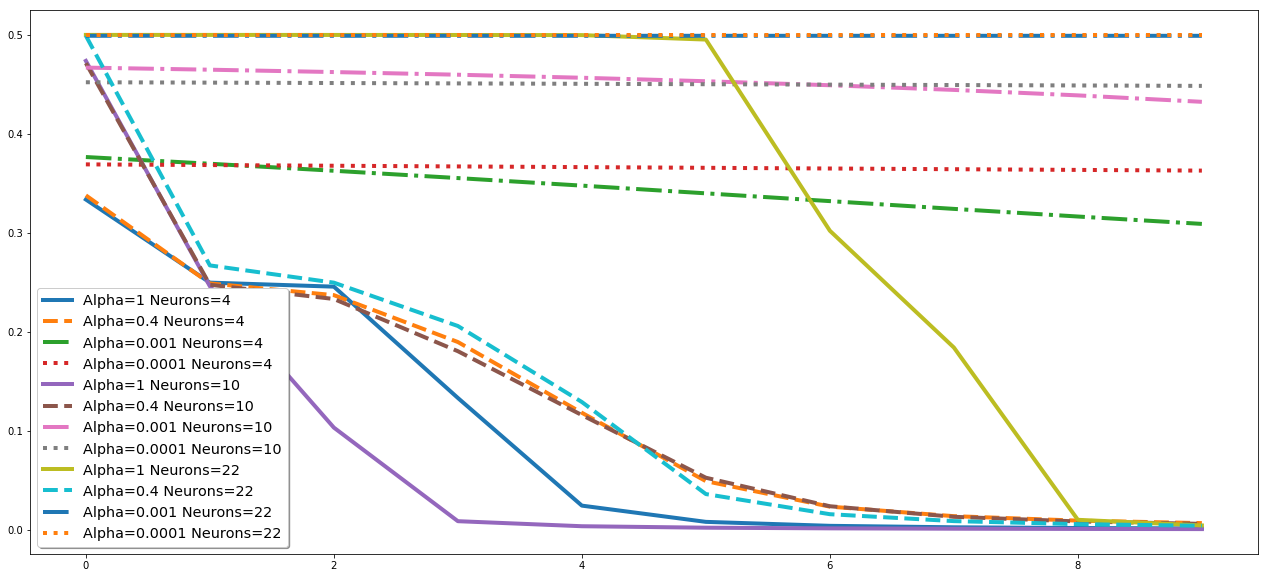

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create plots with pre-defined labels.
fig, ax = plt.subplots(figsize=(22,10))
for k, s in list(zip(result.keys(), styles)):
    ax.plot(result[k], s, label=k, linewidth=4)

legend = ax.legend(loc='best', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('white')

plt.show()